In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2023-12-03 16:09:30--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 142.250.98.207, 142.250.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   137MB/s    in 1.6s    

2023-12-03 16:09:31 (137 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
!tar -xzvf "flower_photos.tgz" -C "." > xx
print("Unzipped")

Unzipped


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

Load ResNet50 model

In [ ]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')
print('model has',len(model.layers),'layers')
model.summary()

102967424/102967424 [==============================] - 1s 0us/step
model has 177 layers
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on

Load data

In [ ]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (224,224))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img('flower_photos')
print('loaded',len(samples),' samples')

print('classes',set(labels))

loaded 3670  samples
classes {'roses', 'daisy', 'tulips', 'dandelion', 'sunflowers'}


Preprocess image for ResNet50

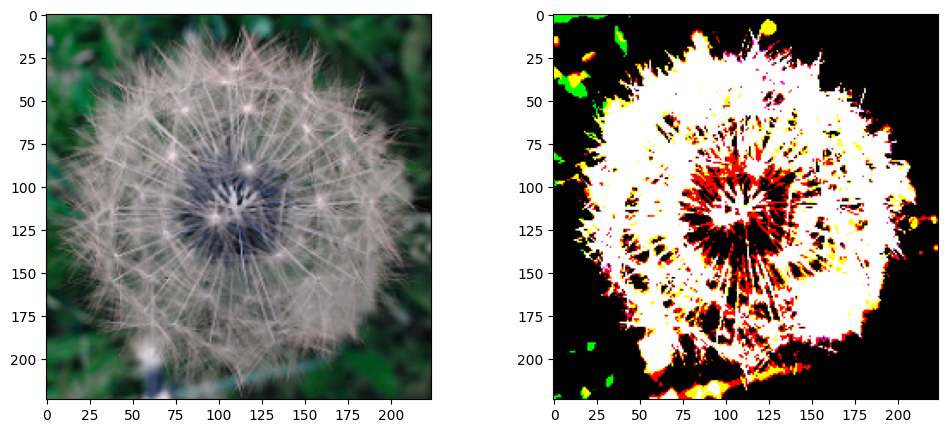

In [ ]:
org_samples = samples[:]
samples = tf.keras.applications.resnet50.preprocess_input(samples)

## compare original and preprocessed
fig,(org_plot,prep_plot) = plt.subplots(1,2, figsize=(12, 5))
org_plot.imshow(org_samples[1])
prep_plot.imshow(samples[1])

Use ResNet50 to classify images

In [ ]:
predictions = model.predict(samples)

115/115 [==============================] - 705s 6s/step


In [ ]:
top3 = tf.keras.applications.resnet50.decode_predictions(predictions, top = 3)
for i in range(len(samples)):
#    print(labels[i],'->',top3[i])

## Pretty version
   print("{} -> ({}:{:.2f}, {}:{:.2f}, {}:{:.2f})".format(labels[i],
                top3[i][0][1],top3[i][0][2],
                top3[i][1][1],top3[i][1][2],
                top3[i][2][1],top3[i][2][2]))

35363/35363 [==============================] - 0s 0us/step
dandelion -> (cardoon:0.77, daisy:0.04, sea_urchin:0.01)
dandelion -> (coil:0.27, sea_urchin:0.06, spider_web:0.05)
dandelion -> (cardoon:0.92, sea_urchin:0.04, buckeye:0.02)
dandelion -> (sea_urchin:0.23, parachute:0.14, jellyfish:0.10)
dandelion -> (picket_fence:0.75, daisy:0.09, mailbox:0.05)
dandelion -> (sea_anemone:0.56, jellyfish:0.11, peacock:0.06)
dandelion -> (sea_anemone:0.45, lorikeet:0.27, peacock:0.11)
dandelion -> (sea_urchin:0.57, cardoon:0.15, buckeye:0.09)
dandelion -> (jellyfish:0.50, teddy:0.35, sea_anemone:0.06)
dandelion -> (fly:0.65, lionfish:0.27, ant:0.01)
dandelion -> (cardoon:0.84, cabbage_butterfly:0.11, daisy:0.02)
dandelion -> (pot:0.46, daisy:0.33, pinwheel:0.04)
dandelion -> (bubble:0.63, golf_ball:0.07, bucket:0.06)
dandelion -> (sarong:0.13, monarch:0.10, picket_fence:0.08)
dandelion -> (swab:0.38, porcupine:0.33, cardoon:0.03)
dandelion -> (nail:0.17, swab:0.13, sea_urchin:0.12)
dandelion -> (

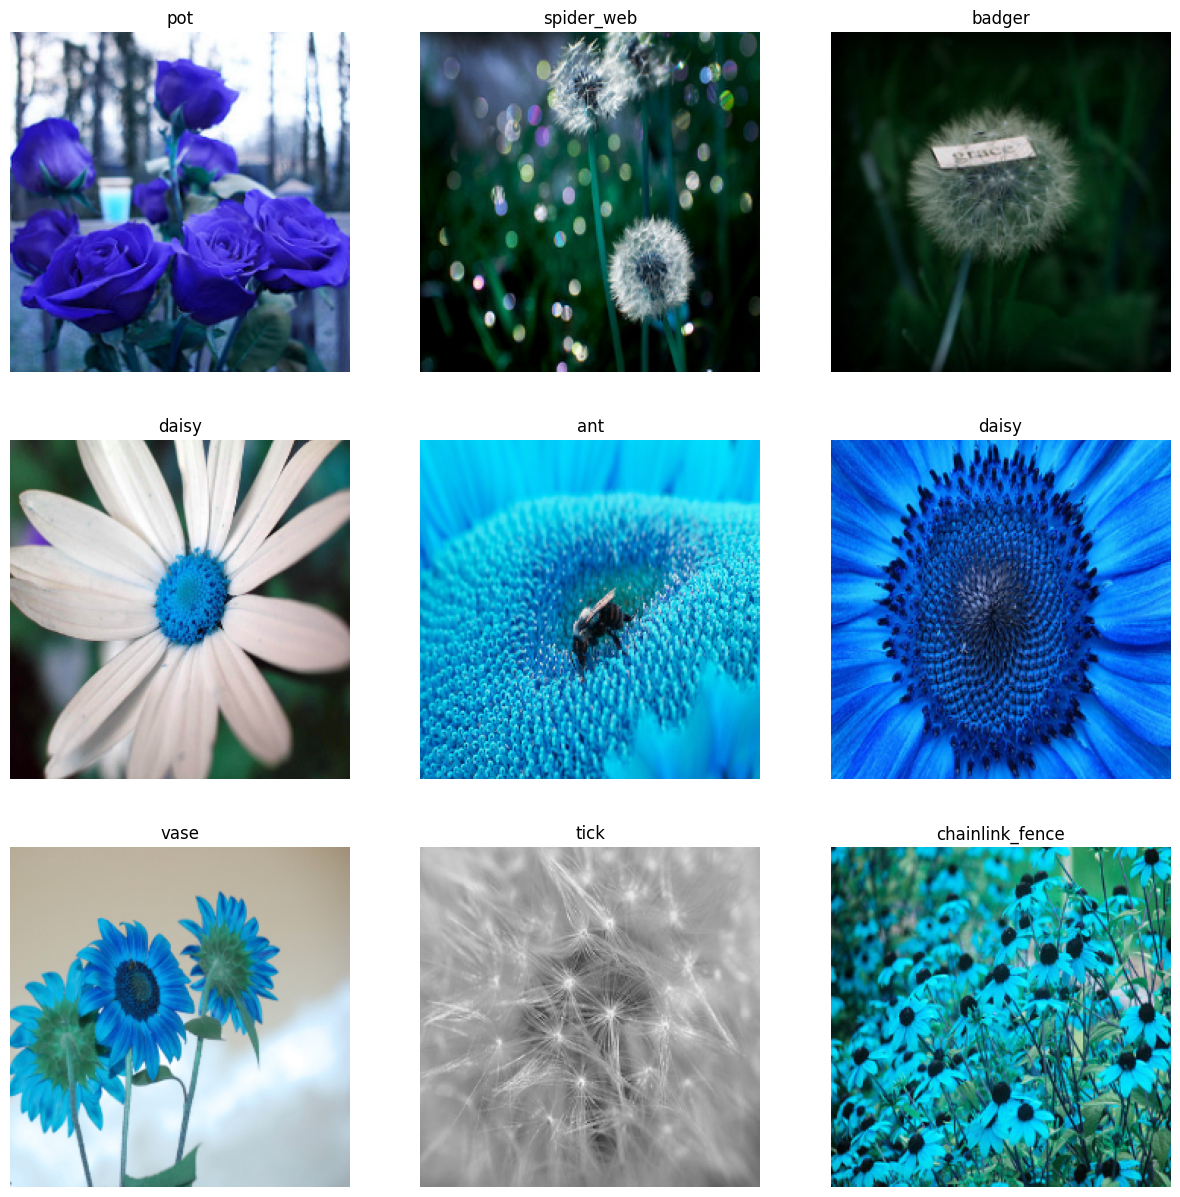

In [ ]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 15))
for i in range(9):
    n = random.randrange(len(samples))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(org_samples[n])
    plt.title(tf.keras.applications.resnet50.decode_predictions(predictions, top = 1)[n][0][1])
    plt.axis("off")

Transfer learning

In [ ]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)
print("Layers:",len(base_model.layers))
#base_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Layers: 175


In [ ]:
print("Full model:",len(model.layers),'layers')
for i,layer in enumerate(model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

print()
print("Base model:",len(base_model.layers),'layers')
for i,layer in enumerate(base_model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(base_model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

Full model: 177 layers
   0 input_1 <class 'keras.src.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D'>
   2 conv1_conv <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
  ...
   171 conv5_block3_3_conv <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
   172 conv5_block3_3_bn <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
   173 conv5_block3_add <class 'keras.src.layers.merging.add.Add'>
   174 conv5_block3_out <class 'keras.src.layers.core.activation.Activation'>
   175 avg_pool <class 'keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D'>
   176 predictions <class 'keras.src.layers.core.dense.Dense'>

Base model: 175 layers
   0 input_2 <class 'keras.src.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D'>
   2 conv1_conv <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
  ...
   171 conv5_bloc

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
last_layer = tf.keras.layers.Dense(5, activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = base_model.input, outputs = last_layer)

print("Combined model:",len(model.layers),'layers')

Combined model: 181 layers


In [ ]:
for layer in model.layers[:175]:
    layer.trainable = False

for layer in model.layers[175:]:
    layer.trainable = True


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # encoder
intlabels = encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(intlabels)
print("One-hot labels",labels.shape)

One-hot labels (3670, 5)


Create and fit model

In [ ]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,
                test_size=0.5
                #random_state=42
                )
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

checkpt = ModelCheckpoint (filepath='resnet50_model.h5', save_best_only=True)
estopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

EPOCHS = 5
H = model.fit(trainSamples, trainLabels, epochs=EPOCHS, batch_size=10, validation_data=(testSamples,testLabels),
             callbacks = [estopping,checkpt])
print("Done")

(3670, 224, 224, 3)
Epoch 1/5
184/184 [==============================] - ETA: 0s - loss: 0.6722 - accuracy: 0.7580

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


184/184 [==============================] - 785s 4s/step - loss: 0.6722 - accuracy: 0.7580 - val_loss: 0.6323 - val_accuracy: 0.8060
Epoch 2/5
184/184 [==============================] - 720s 4s/step - loss: 0.3370 - accuracy: 0.8905 - val_loss: 0.5185 - val_accuracy: 0.8512
Epoch 3/5
184/184 [==============================] - 659s 4s/step - loss: 0.2607 - accuracy: 0.9134 - val_loss: 0.5097 - val_accuracy: 0.8529
Epoch 4/5
184/184 [==============================] - 645s 4s/step - loss: 0.1954 - accuracy: 0.9379 - val_loss: 0.4767 - val_accuracy: 0.8654
Epoch 5/5
184/184 [==============================] - 639s 3s/step - loss: 0.1871 - accuracy: 0.9433 - val_loss: 0.6856 - val_accuracy: 0.8496
Done


In [ ]:
def show(H, model, testSamples, testLabels):
  import matplotlib.pyplot as plt
  # Wykres train_loss i val_loss
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(H.history['loss'], label='Train Loss')
  plt.plot(H.history['val_loss'], label='Validation Loss')
  plt.title('Train and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Wykres train_accuracy i val_accuracy
  plt.subplot(1, 2, 2)
  plt.plot(H.history['accuracy'], label='Train Accuracy')
  plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Train and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
  testResults = model.predict(testSamples)

  print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
  print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
  print("CNN Accuracy: {:.2f}".format(accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
  print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))

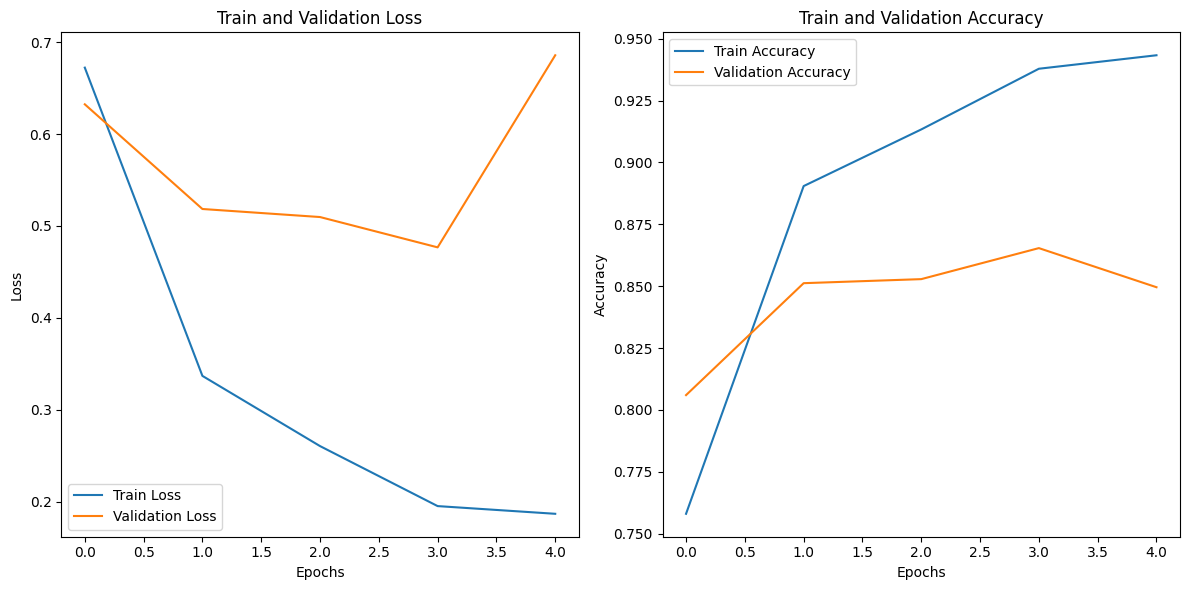

58/58 [==============================] - 372s 6s/step
[[289   5   1   5   3]
 [ 51 389   1  18   8]
 [ 13   1 247   6  49]
 [ 36   2   6 299  14]
 [ 35   1  16   5 335]]
              precision    recall  f1-score   support

           0       0.68      0.95      0.80       303
           1       0.98      0.83      0.90       467
           2       0.91      0.78      0.84       316
           3       0.90      0.84      0.87       357
           4       0.82      0.85      0.84       392

    accuracy                           0.85      1835
   macro avg       0.86      0.85      0.85      1835
weighted avg       0.87      0.85      0.85      1835

CNN Accuracy: 0.85
Cohen's Kappa: 0.81


In [ ]:
show(H, model, testSamples, testLabels)